<a href="https://colab.research.google.com/github/D-Soto/Coco/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, roc_auc_score, plot_confusion_matrix, plot_roc_curve, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.ensemble import GradientBoostingClassifier, RandomForestRegressor

In [188]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project 2/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [190]:
df.columns = ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [191]:
X = df.iloc[:, [3, 4]].values

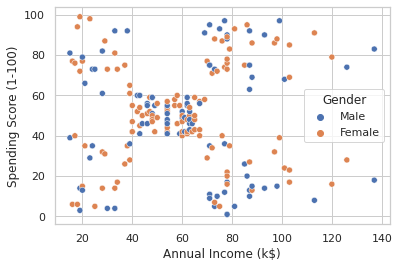

In [192]:
sns.scatterplot(x='Annual Income (k$)' , y = 'Spending Score (1-100)',data=df , hue='Gender')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


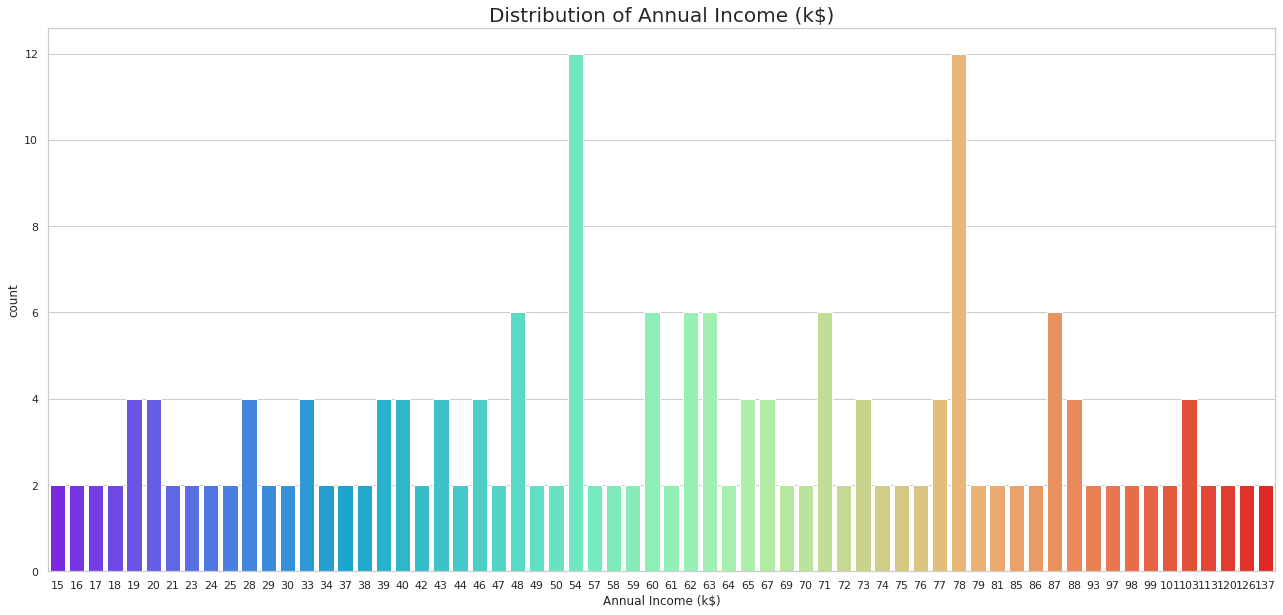

In [193]:
plt.figure(figsize=(22,10))
sns.countplot(df['Annual Income (k$)'], palette = 'rainbow')
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, '#Customers')

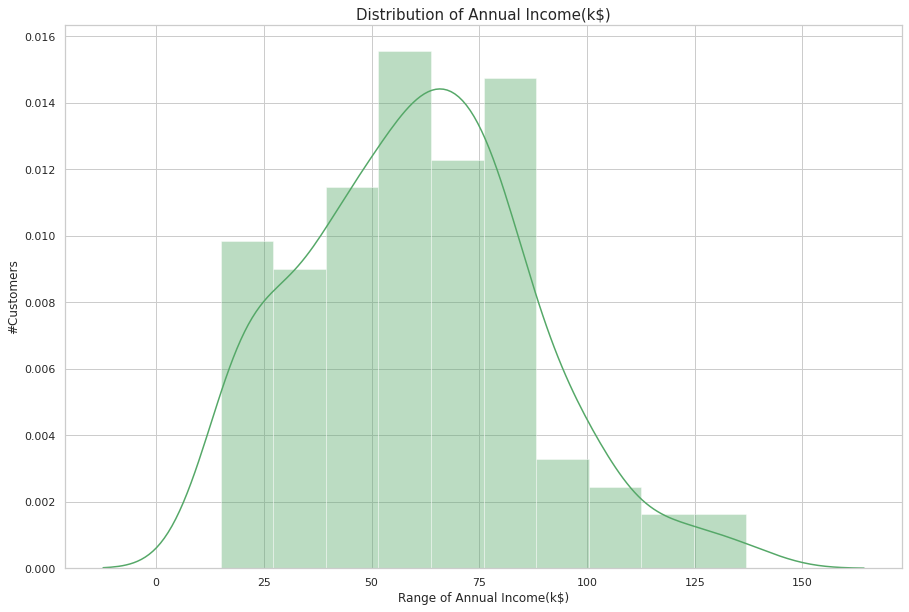

In [194]:
plt.figure(figsize=(15,10))
sns.set(style = 'whitegrid')
sns.distplot(df['Annual Income (k$)'],color='g')
plt.title('Distribution of Annual Income(k$)', fontsize = 15)
plt.xlabel('Range of Annual Income(k$)')
plt.ylabel('#Customers')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


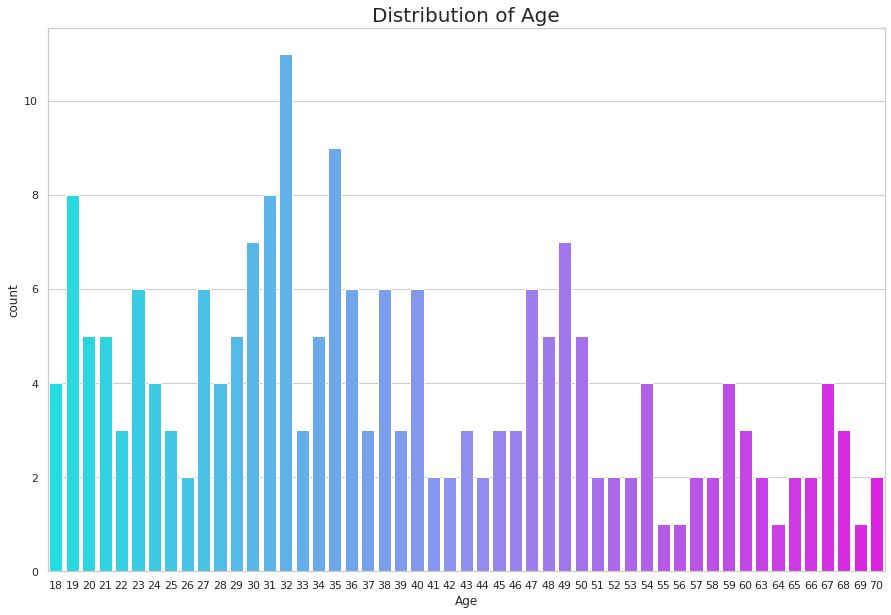

In [195]:
plt.figure(figsize=(15,10))
sns.countplot(df['Age'], palette = 'cool')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, '#Customers')

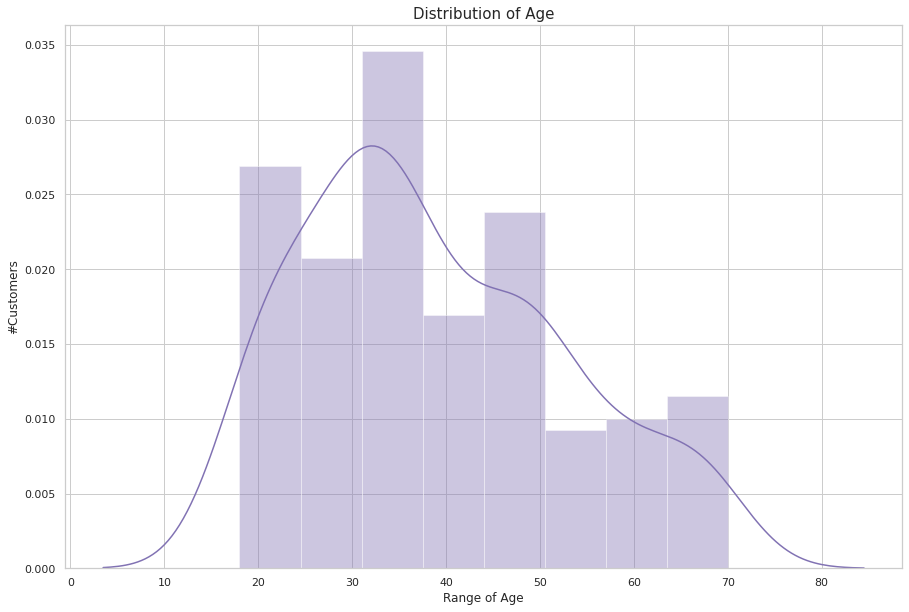

In [196]:
plt.figure(figsize=(15,10))
sns.set(style = 'whitegrid')
sns.distplot(df['Age'],color='m')
plt.title('Distribution of Age', fontsize = 15)
plt.xlabel('Range of Age')
plt.ylabel('#Customers')

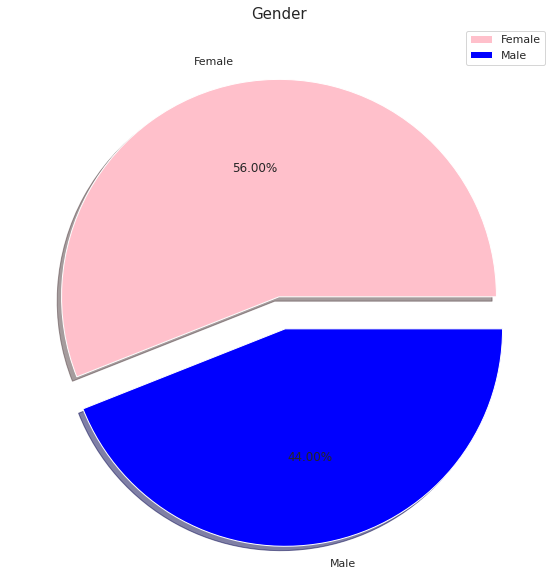

In [197]:
plt.figure(figsize=(10,10))
size = df['Gender'].value_counts()
colors = ['pink', 'blue']
plt.pie(size, colors = colors, explode = [0, 0.15], labels = ['Female', 'Male'], shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 15)
plt.axis('off')
plt.legend()
plt.show()

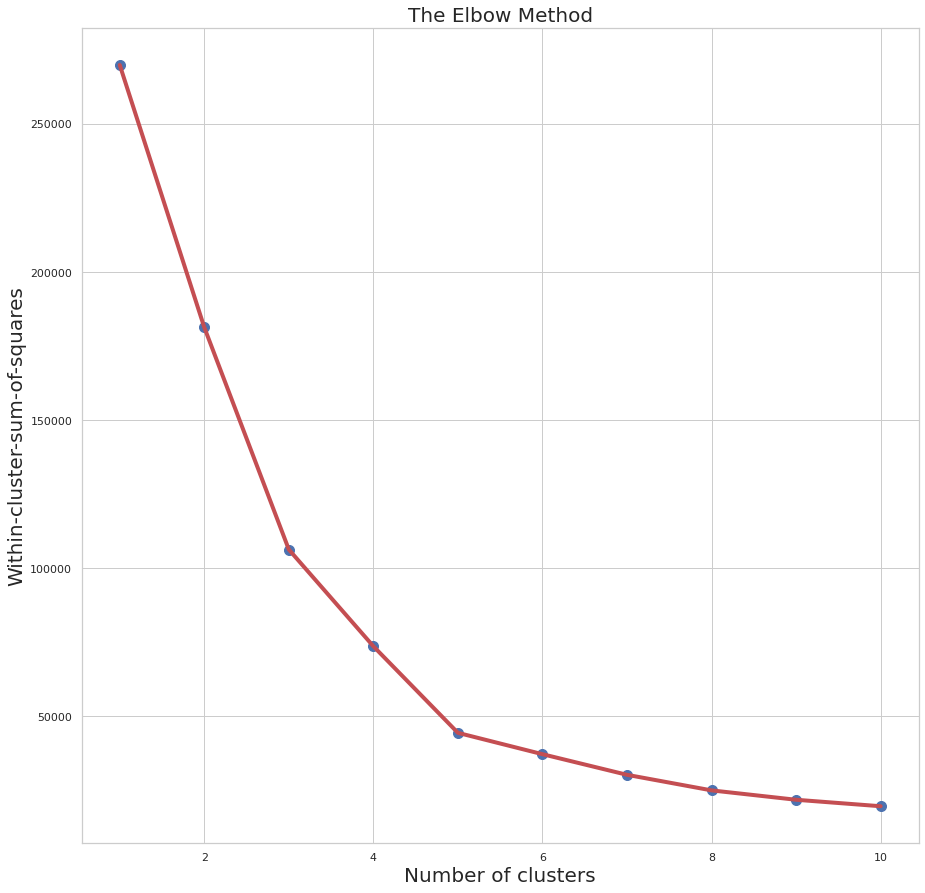

In [198]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,15))
plt.scatter(range(1, 11),wcss,c='b',s=100)
plt.plot(range(1, 11),wcss,c='r',linewidth=4)
plt.title('The Elbow Method',fontsize=20)
plt.xlabel('Number of clusters',fontsize=20)
plt.ylabel('Within-cluster-sum-of-squares',fontsize=20)
plt.show()

In [199]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)

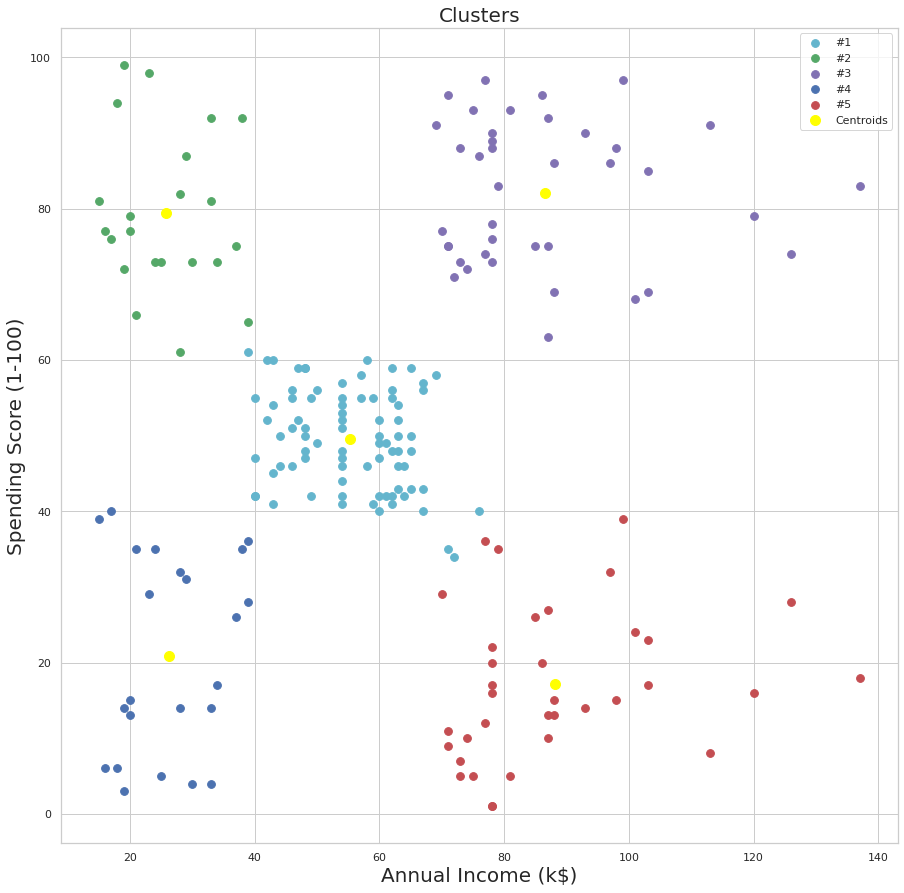

In [200]:
plt.figure(figsize=(15,15))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 60, c = 'c', label = '#1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 60, c = 'g', label = '#2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 60, c = 'm', label = '#3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 60, c = 'b', label = '#4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 60, c = 'r', label = '#5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters',fontsize=20)
plt.xlabel('Annual Income (k$)',fontsize=20)
plt.ylabel('Spending Score (1-100)',fontsize=20)
plt.legend()
plt.show()

In [201]:
temp = df.groupby('Gender')['Spending Score (1-100)'].agg(['mean', 'min', 'max'])
temp = pd.DataFrame(temp)
temp

,mean,min,max
Gender,,,
Female,51.526786,5,99
Male,48.511364,1,97


as we can see female spend more money than male

In [202]:
temp = df.groupby('Age')['Spending Score (1-100)'].agg(['mean', 'min', 'max', 'median'])
temp = pd.DataFrame(temp)
temp

,mean,min,max,median
Age,,,,
18,60.000000,41,92,53.5
19,39.750000,5,59,48.0
20,40.200000,5,75,49.0
21,66.800000,42,81,73.0
22,70.000000,55,79,76.0
23,63.333333,29,94,64.5
24,71.500000,52,92,71.0
25,39.666667,12,73,34.0
26,54.500000,54,55,54.5


people between the age of 25-40(estimated from data) spend more money

In [203]:
df['cluster'] = y_kmeans

In [204]:
cl_1 = df.loc[df['cluster']== 0]

In [205]:
cl_2 = df.loc[df['cluster']== 1]

In [206]:
cl_3 = df.loc[df['cluster']== 2]

In [207]:
cl_4 = df.loc[df['cluster']== 3]

In [208]:
cl_5 = df.loc[df['cluster']== 4]

In [227]:
G1 = cl_1.groupby('Gender')['Spending Score (1-100)', 'Age'].agg(['mean','median'])
print(G1)
G2 = cl_2.groupby('Gender')['Spending Score (1-100)', 'Age'].agg(['mean','median'])
print(G2)
G3 = cl_3.groupby('Gender')['Spending Score (1-100)', 'Age'].agg(['mean','median'])
print(G3)
G4 = cl_4.groupby('Gender')['Spending Score (1-100)', 'Age'].agg(['mean','median'])
print(G4)
G5 = cl_5.groupby('Gender')['Spending Score (1-100)', 'Age'].agg(['mean','median'])
print(G5)

       Spending Score (1-100)               Age       
                         mean median       mean median
Gender                                                
Female              49.000000   49.5  40.895833   41.5
Male                50.272727   51.0  45.363636   48.0
       Spending Score (1-100)               Age       
                         mean median       mean median
Gender                                                
Female              80.538462     77  25.461538     23
Male                77.666667     79  25.000000     24
       Spending Score (1-100)               Age       
                         mean median       mean median
Gender                                                
Female              81.666667   83.0  32.190476     32
Male                82.666667   85.5  33.277778     32
       Spending Score (1-100)               Age       
                         mean median       mean median
Gender                                                
Female    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Indexing with 

In [229]:
A1 = cl_1.groupby('Gender')['Annual Income (k$)'].agg(['mean','median'])
print(A1)
A2 = cl_2.groupby('Gender')['Annual Income (k$)'].agg(['mean','median'])
print(A2)
A3 = cl_3.groupby('Gender')['Annual Income (k$)'].agg(['mean','median'])
print(A3)
A4 = cl_4.groupby('Gender')['Annual Income (k$)'].agg(['mean','median'])
print(A4)
A5 = cl_5.groupby('Gender')['Annual Income (k$)'].agg(['mean','median'])
print(A5)

             mean  median
Gender                   
Female  55.354167      57
Male    55.212121      54
             mean  median
Gender                   
Female  25.692308      23
Male    25.777778      25
             mean  median
Gender                   
Female  86.047619    79.0
Male    87.111111    82.5
             mean  median
Gender                   
Female  27.357143      28
Male    24.666667      23
             mean  median
Gender                   
Female  90.937500    87.5
Male    85.894737    81.0
